<a href="https://colab.research.google.com/github/walterkwong/MATH10017-2022/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files in

In [55]:
!unzip /content/data_project4_option2.zip

unzip:  cannot find or open /content/data_project4_option2.zip, /content/data_project4_option2.zip.zip or /content/data_project4_option2.zip.ZIP.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ma_path = "/content/Marylebone_AirQualityDataHourly_2018-2021_clean.csv"
Ro_path = "/content/Rochester_AirQualityDataHourly_2018-2021_clean.csv"

Ma_df = pd.read_csv(Ma_path,skiprows=4)
Ro_df = pd.read_csv(Ro_path,skiprows=4)

In [3]:
def processing(df):
  df["Year"] = df["Date Time"].apply(lambda x: x.split("-")[0])
  df["Month"] = df["Date Time"].apply(lambda x: x.split("-")[1])
  df["Day"] = df["Date Time"].apply(lambda x: x.split("-")[2][:2])
  df.replace('No data', np.nan,inplace=True)

In [4]:
processing(Ma_df)
processing(Ro_df)

In [5]:
Ma_df

,Date Time,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),Status PM10,PM2.5 particulate matter (Hourly measured),Status PM2.5,Nitrogen dioxide,Status NO2,Year,Month,Day
0,2018-01-01 00:00:00,0,6,NaN,N ugm-3 (TEOM FDMS),NaN,V ugm-3 (TEOM FDMS),NaN,V ugm-3,2018,01,01
1,2018-01-01 01:00:00,1,0,24.6,V ugm-3 (TEOM FDMS),12.7,V ugm-3 (TEOM FDMS),79.0596,V ugm-3,2018,01,01
2,2018-01-01 02:00:00,2,0,18.7,V ugm-3 (TEOM FDMS),11.6,V ugm-3 (TEOM FDMS),97.05587,V ugm-3,2018,01,01
3,2018-01-01 03:00:00,3,0,17.2,V ugm-3 (TEOM FDMS),7.6,V ugm-3 (TEOM FDMS),101.07355,V ugm-3,2018,01,01
4,2018-01-01 04:00:00,4,0,10.8,V ugm-3 (TEOM FDMS),2.3,V ugm-3 (TEOM FDMS),81.56557,V ugm-3,2018,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...
27715,2021-02-28 19:00:00,19,6,21,N ugm-3 (TEOM FDMS),13.1,N ugm-3 (TEOM FDMS),49.725,N ugm-3,2021,02,28
27716,2021-02-28 20:00:00,20,6,28.4,N ugm-3 (TEOM FDMS),15.2,N ugm-3 (TEOM FDMS),56.41875,N ugm-3,2021,02,28
27717,2021-02-28 21:00:00,21,6,10.9,N ugm-3 (TEOM FDMS),8.2,N ugm-3 (TEOM FDMS),39.20625,N ugm-3,2021,02,28
27718,2021-02-28 22:00:00,22,6,19.4,N ugm-3 (TEOM FDMS),8.9,N ugm-3 (TEOM FDMS),35.38125,N ugm-3,2021,02,28


In [5]:
# change to each of them, convert to array, do subtractions and plot?

dictionary = {}
for year in range(2018,2022):
  for month in range(1,13):
    if year == 2021 and month == 3:
      break
    # globals()[f"MaPM10{year}{month:02d}"] = Ma_df[(Ma_df["Month"]=="{:02d}".format(month)) & (Ma_df["Year"] == str(year))]["PM10 particulate matter (Hourly measured)"].astype('float').mean(skipna=True)
    dictionary[f"{year}-{month:02d}"] = Ma_df[(Ma_df["Month"]=="{:02d}".format(month)) & (Ma_df["Year"] == str(year))]["PM10 particulate matter (Hourly measured)"].astype('float').mean(skipna=True) - Ro_df[(Ro_df["Month"]=="{:02d}".format(month)) & (Ro_df["Year"] == str(year))]["PM10 particulate matter (Hourly measured)"].astype('float').mean(skipna=True)

In [6]:
from math import isnan
dictionary = {k: dictionary[k] for k in dictionary if not isnan(dictionary[k])}
dictionary

{'2018-01': 8.615178648035792,
 '2018-02': 6.973809523809528,
 '2018-03': 5.6140074311734445,
 '2018-04': 3.9864652157015144,
 '2018-05': -0.8988130704118795,
 '2018-06': 2.8231736355655492,
 '2018-07': 3.6088537759439845,
 '2018-08': 6.417457630868622,
 '2018-09': 9.910333032934622,
 '2018-10': 8.68562544185224,
 '2018-11': 9.78405138888889,
 '2018-12': 10.695919309785547,
 '2019-01': 9.048454395067301,
 '2019-02': 12.952154984008537,
 '2019-03': 7.976406392520518,
 '2019-04': 1.3745486111111163,
 '2019-05': 7.092664233807664,
 '2019-06': 9.796017720306512,
 '2019-07': 7.389617827576361,
 '2019-08': 4.115291947818264,
 '2019-09': 6.256774284534412,
 '2019-10': 7.586568188266618,
 '2019-11': 6.985008588672233,
 '2019-12': 6.3790994623655894,
 '2020-01': 4.795664281496675,
 '2020-02': 6.134889367816092,
 '2020-03': 1.6256547513248396,
 '2020-04': -5.1115671685340835,
 '2020-05': -1.3887259803495358,
 '2020-06': -1.3444097222222222,
 '2020-07': -0.7036331588379561,
 '2020-08': -3.4218261

In [7]:
import datetime as dt

lists = sorted(dictionary.items())
months, y = zip(*lists)
x = [dt.datetime.strptime(d,"%Y-%m").date() for d in months]
x

[datetime.date(2018, 1, 1),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 3, 1),
 datetime.date(2018, 4, 1),
 datetime.date(2018, 5, 1),
 datetime.date(2018, 6, 1),
 datetime.date(2018, 7, 1),
 datetime.date(2018, 8, 1),
 datetime.date(2018, 9, 1),
 datetime.date(2018, 10, 1),
 datetime.date(2018, 11, 1),
 datetime.date(2018, 12, 1),
 datetime.date(2019, 1, 1),
 datetime.date(2019, 2, 1),
 datetime.date(2019, 3, 1),
 datetime.date(2019, 4, 1),
 datetime.date(2019, 5, 1),
 datetime.date(2019, 6, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 8, 1),
 datetime.date(2019, 9, 1),
 datetime.date(2019, 10, 1),
 datetime.date(2019, 11, 1),
 datetime.date(2019, 12, 1),
 datetime.date(2020, 1, 1),
 datetime.date(2020, 2, 1),
 datetime.date(2020, 3, 1),
 datetime.date(2020, 4, 1),
 datetime.date(2020, 5, 1),
 datetime.date(2020, 6, 1),
 datetime.date(2020, 7, 1),
 datetime.date(2020, 8, 1),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 12, 1),
 datetime.date(2021, 1, 1),
 datetime.da

++ PM10 for rural and urban

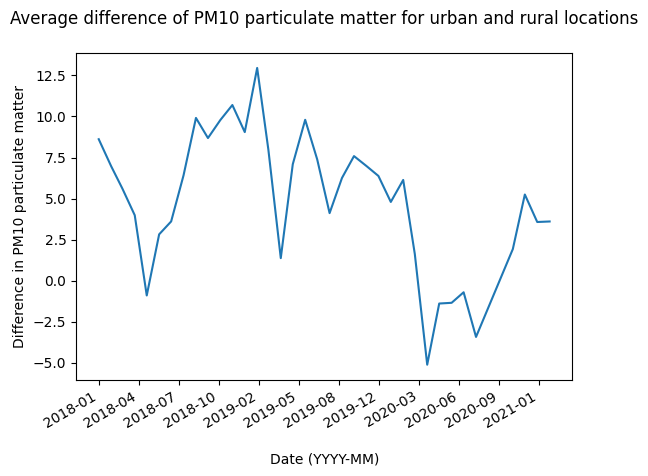

In [12]:
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.xlabel("\nDate (YYYY-MM)")
plt.ylabel("\nDifference in PM10 particulate matter")
plt.title("Average difference of PM10 particulate matter for urban and rural locations\n")

plt.show()

Impact on the PM10 measurements, on average, across the hours of the day

In [13]:
MaAM = {}
MaPM = {}
RoAM = {}
RoPM = {}
for year in range(2018,2022):
  for month in range(1,13):
    if year == 2021 and month == 3:
      break
    MaAM[f"{year}-{month:02d}"] = Ma_df[(Ma_df["Month"]=="{:02d}".format(month)) & (Ma_df["Year"] == str(year)) & (Ma_df["Hour of Day"] == 6)]["PM10 particulate matter (Hourly measured)"].astype('float').mean(skipna=True)
    MaPM[f"{year}-{month:02d}"] = Ma_df[(Ma_df["Month"]=="{:02d}".format(month)) & (Ma_df["Year"] == str(year)) & (Ma_df["Hour of Day"] == 18)]["PM10 particulate matter (Hourly measured)"].astype('float').mean(skipna=True)
    RoAM[f"{year}-{month:02d}"] = Ro_df[(Ro_df["Month"]=="{:02d}".format(month)) & (Ro_df["Year"] == str(year)) & (Ro_df["Hour of Day"] == 6)]["PM10 particulate matter (Hourly measured)"].astype('float').mean(skipna=True)
    RoPM[f"{year}-{month:02d}"] = Ro_df[(Ro_df["Month"]=="{:02d}".format(month)) & (Ro_df["Year"] == str(year)) & (Ro_df["Hour of Day"] == 18)]["PM10 particulate matter (Hourly measured)"].astype('float').mean(skipna=True)

In [14]:
def unpack(dic):
  dic = {k: dic[k] for k in dic if not isnan(dic[k])}
  lists = sorted(dic.items())
  months, y = zip(*lists)
  x = [dt.datetime.strptime(d,"%Y-%m").date() for d in months]
  return(x,y)

In [15]:
x_MaAM, y_MaAM = unpack(MaAM)
x_MaPM, y_MaPM = unpack(MaPM)
x_RoAM, y_RoAM = unpack(RoAM)
x_RoPM, y_RoPM = unpack(RoPM)

In [17]:
dic = {k: RoAM[k] for k in RoAM if not isnan(RoAM[k])}
lists = sorted(dic.items())
months, y = zip(*lists)
x = [dt.datetime.strptime(d,"%Y-%m").date() for d in months]

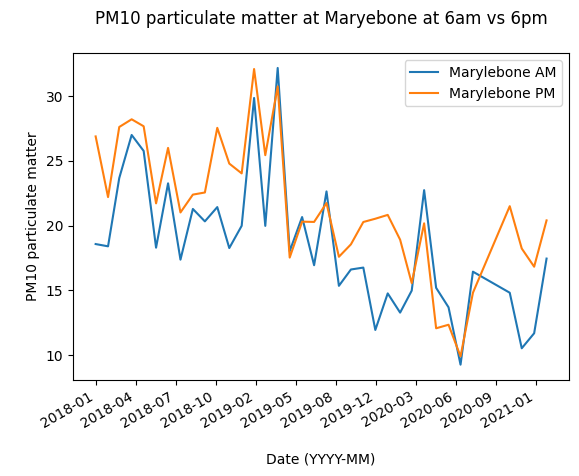

In [22]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(x_MaAM,y_MaAM, label = "Marylebone AM")
plt.plot(x_MaPM,y_MaPM, label = "Marylebone PM")
plt.gcf().autofmt_xdate()

plt.xlabel("\nDate (YYYY-MM)")
plt.ylabel("\nPM10 particulate matter")
plt.title("PM10 particulate matter in Maryebone at 6am vs 6pm\n")
plt.legend()

plt.show()

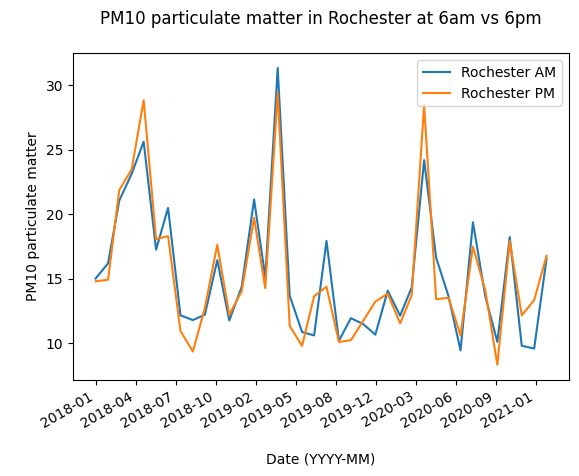

In [23]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(x_RoAM,y_RoAM, label="Rochester AM")
plt.plot(x_RoPM,y_RoPM, label="Rochester PM")
plt.gcf().autofmt_xdate()

plt.xlabel("\nDate (YYYY-MM)")
plt.ylabel("\nPM10 particulate matter")
plt.title("PM10 particulate matter in Rochester at 6am vs 6pm\n")
plt.legend()

plt.show()

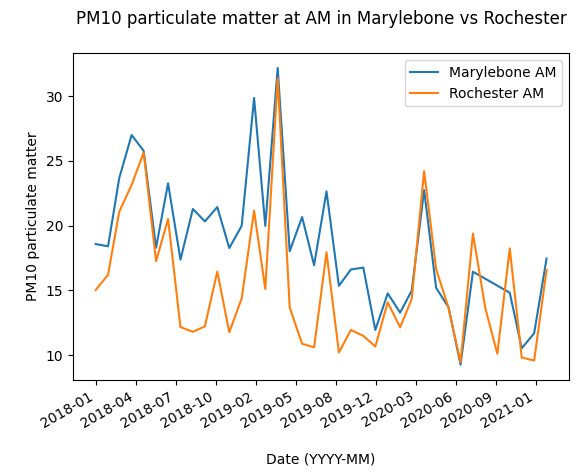

In [24]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(x_MaAM,y_MaAM, label = "Marylebone AM")
plt.plot(x_RoAM,y_RoAM, label = "Rochester AM")
plt.gcf().autofmt_xdate()

plt.xlabel("\nDate (YYYY-MM)")
plt.ylabel("\nPM10 particulate matter")
plt.title("PM10 particulate matter at AM in Marylebone vs Rochester\n")
plt.legend()

plt.show()

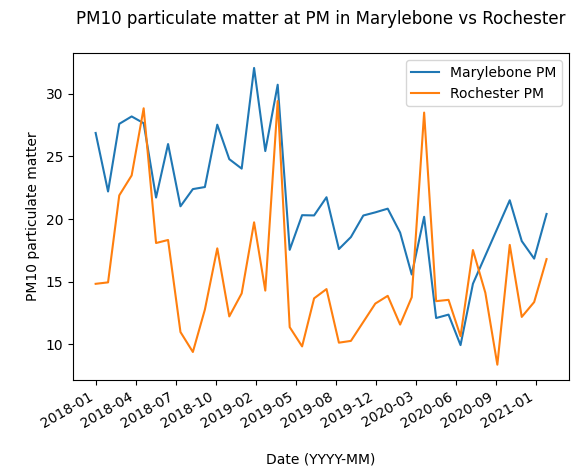

In [25]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(x_MaPM,y_MaPM, label = "Marylebone PM")
plt.plot(x_RoPM,y_RoPM, label = "Rochester PM")
plt.gcf().autofmt_xdate()

plt.xlabel("\nDate (YYYY-MM)")
plt.ylabel("\nPM10 particulate matter")
plt.title("PM10 particulate matter at PM in Marylebone vs Rochester\n")
plt.legend()

plt.show()

Investigate the impact of meteorological conditions on the measurements of particulate matter at one location (urban or rural). Use the representative weather data provided (from London Heathrow airport) which contains data from an overlapping time period.

In [27]:
He_path = "/content/Weather_data_hourly_Heathrow-Airport.csv"
He_df = pd.read_csv(He_path)

PM_10 = Ma_df["PM10 particulate matter (Hourly measured)"]
PM_25 = Ma_df["PM2.5 particulate matter (Hourly measured)"]

He_df_short = He_df[He_df["Date_Hour"].isin(Ma_df["Date Time"].array)]
He_df_short.insert(1,"PM_10", PM_10.values)
He_df_short.insert(1,"PM_2.5", PM_25.values)
del He_df_short["Date_Hour"]
correlation = He_df_short.corr(method = "kendall", numeric_only = False)

He_df_short

# why use Kendall https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall

,PM_2.5,PM_10,Temperature (degrees C),Precipitation (mm),Wind direction (degrees),Wind speed (km/h),Wind gust (km/h),Pressure (hPa)
480952,NaN,NaN,7.0,NaN,250.0,31.7,NaN,997.5
480953,12.7,24.6,6.5,NaN,250.0,29.5,NaN,998.5
480954,11.6,18.7,6.0,NaN,240.0,24.1,NaN,999.5
480955,7.6,17.2,5.6,NaN,240.0,25.9,NaN,999.5
480956,2.3,10.8,6.0,NaN,230.0,20.5,NaN,999.7
...,...,...,...,...,...,...,...,...
508667,13.1,21,7.4,0.0,30.0,8.0,24.1,1034.4
508668,15.2,28.4,6.9,0.0,40.0,9.0,24.1,1034.2
508669,8.2,10.9,6.5,0.0,60.0,15.0,22.2,1034.1
508670,8.9,19.4,5.9,0.0,60.0,11.0,25.9,1034.3


In [28]:
He_df = pd.read_csv(He_path)
He_df_short = He_df[He_df["Date_Hour"].isin(Ma_df["Date Time"].array)]
print(He_df.info())
print(He_df_short.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508672 entries, 0 to 508671
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Date_Hour                 508672 non-null  object 
 1   Temperature (degrees C)   508358 non-null  float64
 2   Precipitation (mm)        22912 non-null   float64
 3   Wind direction (degrees)  492104 non-null  float64
 4   Wind speed (km/h)         507845 non-null  float64
 5   Wind gust (km/h)          21597 non-null   float64
 6   Pressure (hPa)            489405 non-null  float64
dtypes: float64(6), object(1)
memory usage: 27.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27720 entries, 480952 to 508671
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date_Hour                 27720 non-null  object 
 1   Temperature (degrees C)   27720 non-null  fl

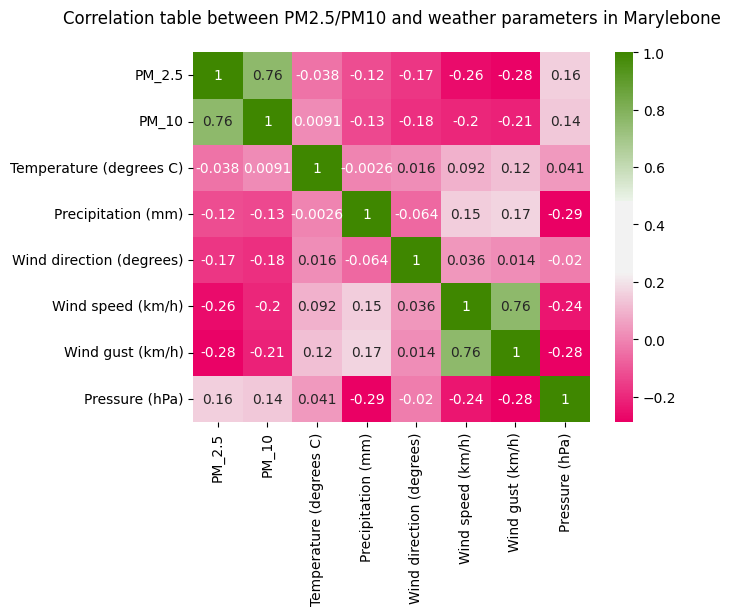

In [36]:
import seaborn as sb
color = sb.diverging_palette(0, 120, s=100, l=50, sep=50, center="light", as_cmap=True)
sb.heatmap(correlation, cmap=color, annot=True)

plt.title("Correlation table between PM2.5/PM10 and weather parameters in Marylebone\n")
plt.show()

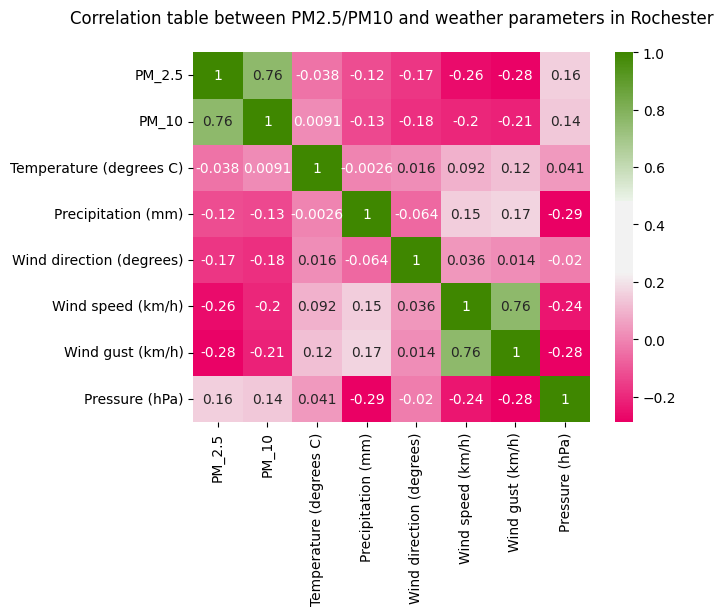

In [37]:
He_path = "/content/Weather_data_hourly_Heathrow-Airport.csv"
He_df = pd.read_csv(He_path)

PM_10 = Ro_df["PM10 particulate matter (Hourly measured)"]
PM_25 = Ro_df["PM2.5 particulate matter (Hourly measured)"]

He_df_short = He_df[He_df["Date_Hour"].isin(Ro_df["Date Time"].array)]
He_df_short.insert(1,"PM_10", PM_10.values)
He_df_short.insert(1,"PM_2.5", PM_25.values)
del He_df_short["Date_Hour"]
correlation = He_df_short.corr(method = "kendall", numeric_only = False)

color = sb.diverging_palette(0, 120, s=100, l=50, sep=50, center="light", as_cmap=True)
sb.heatmap(correlation, cmap=color, annot=True)

plt.title("Correlation table between PM2.5/PM10 and weather parameters in Rochester\n")
plt.show()

Similar, found out that wind gust and speed are the most correlated

easier manipulation, delete all na rows

In [38]:
plot_curve = He_df_short.dropna()

UFuncTypeError: ignored

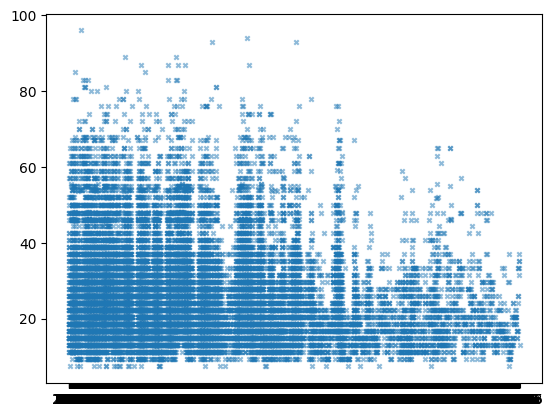

In [39]:
sb.regplot(data=plot_curve,x="PM_10",y="Wind gust (km/h)", marker = "x", logx = True, scatter_kws={"s": 10, 'alpha': 0.5}, line_kws={"lw":1, 'color': 'red'})
# plt.title("Correlation between PM10 and Wind gust, with a logarithmic regression curve\n")
plt.show()

Not representable, using kdeplot instead

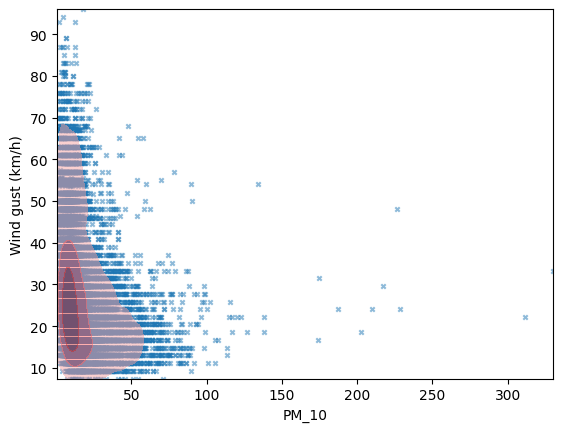

In [123]:
# sb.scatterplot(data=plot_curve,x="PM_10",y="Wind gust (km/h)",  marker="x", s=10, alpha = 0.5)
# sb.kdeplot(data=plot_curve,x="PM_10",y="Wind gust (km/h)", levels = 5, fill=True, cut=0, alpha = 0.7, color = "r")

sb.regplot(data=plot_curve,x="PM_10",y="Wind gust (km/h)", marker = "x", fit_reg = False, scatter_kws={"s": 10, 'alpha': 0.5}, line_kws={"lw":1, 'color': 'red'})
sb.kdeplot(data=plot_curve,x="PM_10",y="Wind gust (km/h)", levels = 4, fill=True, cut=0, alpha = 0.6 color = "r")

plt.title("Correlation between PM10 and Wind gust, with a logarithmic regression curve")
plt.show()

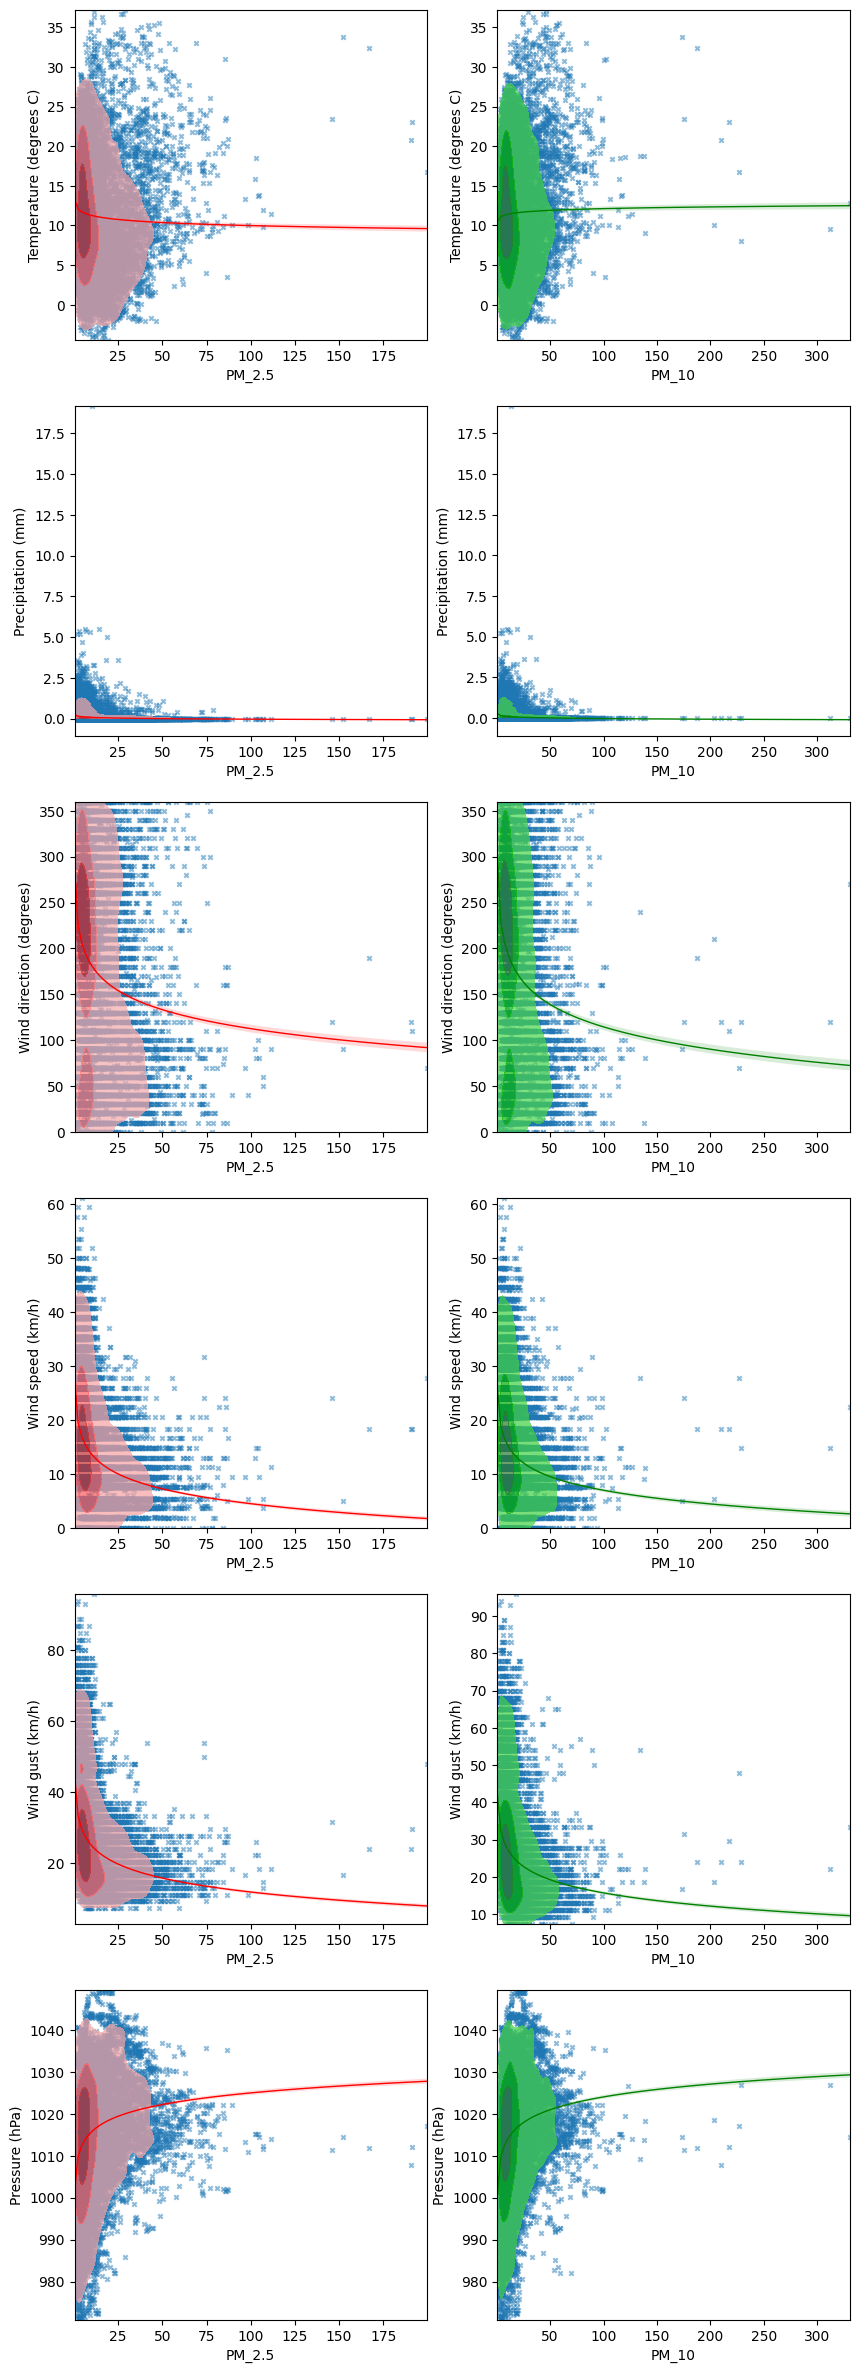

In [124]:
color = ['r','g']
fig,axs = plt.subplots(6,2, figsize = (10,30))
for weather_idx, weather in enumerate(plot_curve.columns[2:]):
  for PM_idx, PM in enumerate(plot_curve.columns[:2]):
    sb.regplot(data=plot_curve,x=PM,y=weather, marker = "x", logx = True, scatter_kws={"s": 10, 'alpha': 0.5}, line_kws={"lw":1, 'color': color[PM_idx]}, ax=axs[weather_idx, PM_idx])
    sb.kdeplot(data=plot_curve,x=PM,y=weather, levels = 4, fill=True, cut=0, alpha = 0.6, color = color[PM_idx], ax=axs[weather_idx, PM_idx])


found out that there's anomalous data for precipitation during exploratory testing

In [125]:
plot_curve = plot_curve[plot_curve["Precipitation (mm)"] < 15.0]

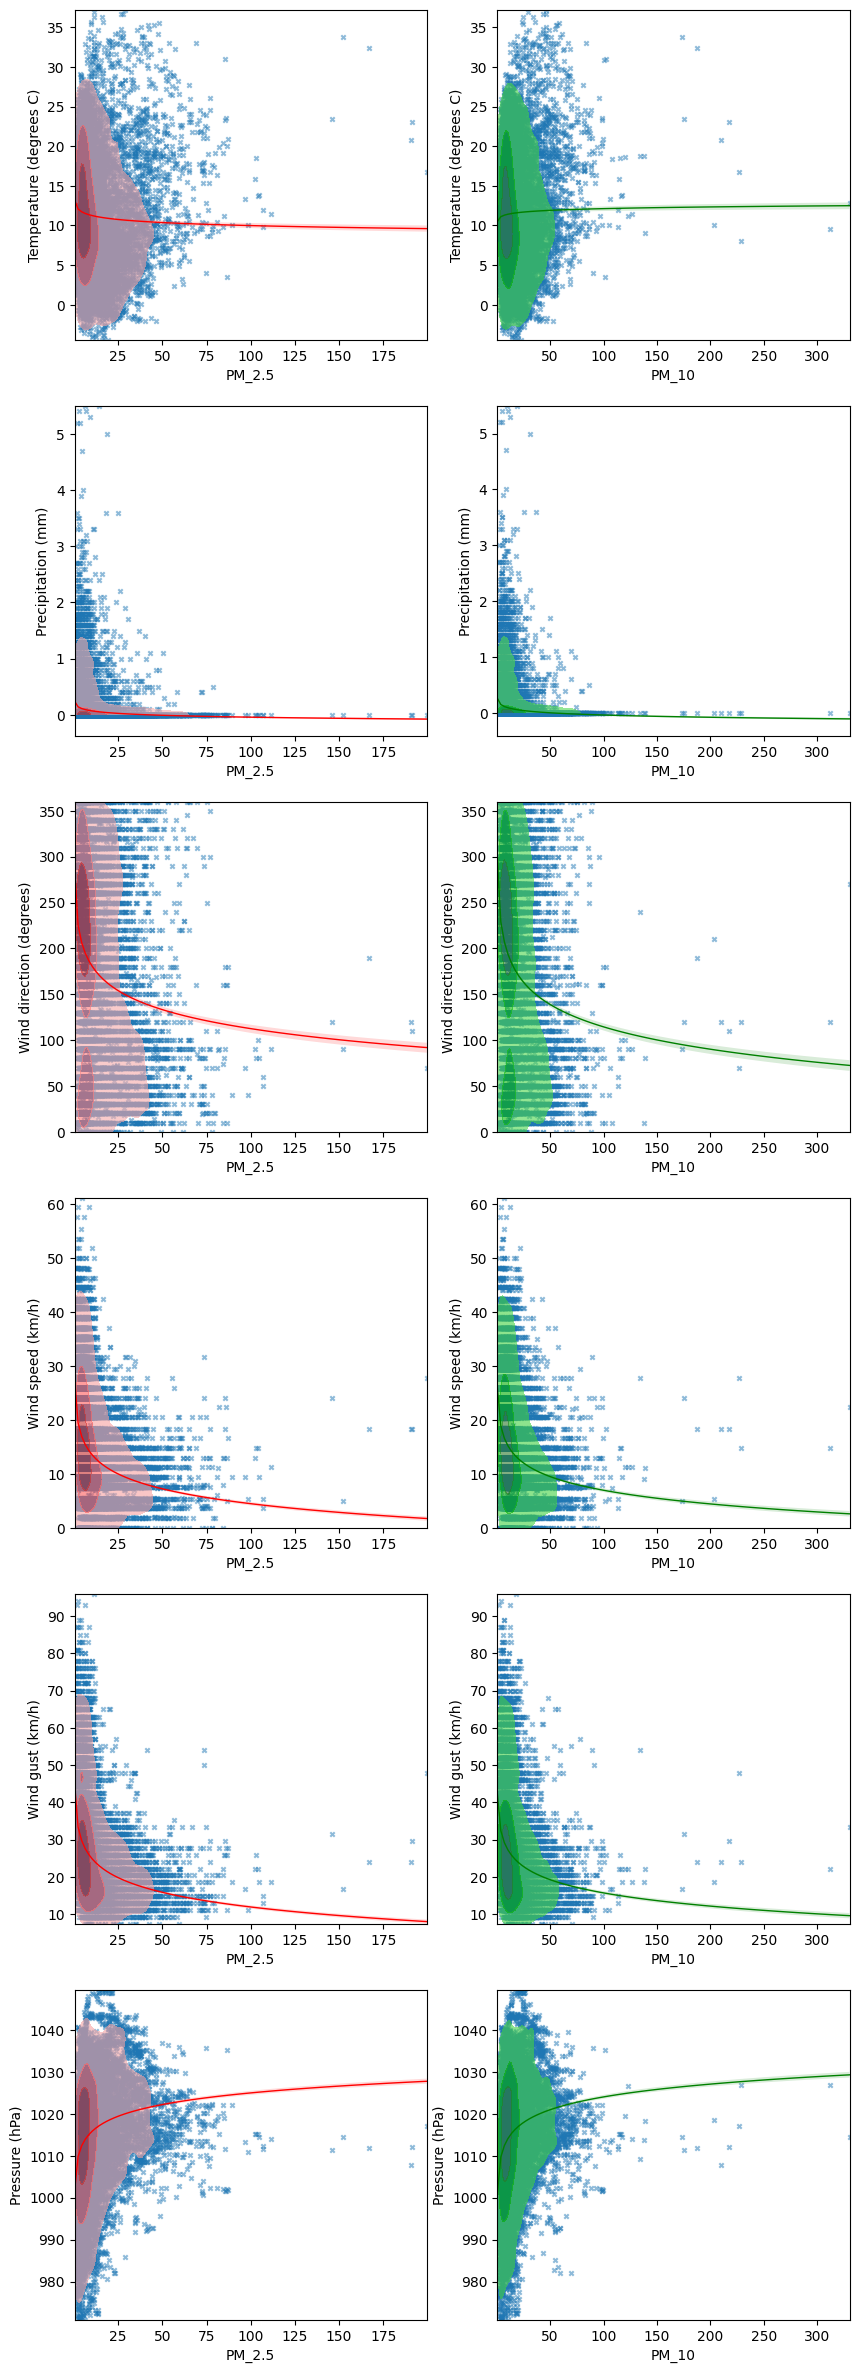

In [126]:
color = ['r','g']
fig,axs = plt.subplots(6,2, figsize = (10,30))
for weather_idx, weather in enumerate(plot_curve.columns[2:]):
  for PM_idx, PM in enumerate(plot_curve.columns[:2]):
    sb.regplot(data=plot_curve,x=PM,y=weather, marker = "x", logx = True, scatter_kws={"s": 10, 'alpha': 0.5}, line_kws={"lw":1, 'color': color[PM_idx]}, ax=axs[weather_idx, PM_idx])
    sb.kdeplot(data=plot_curve,x=PM,y=weather, levels = 4, fill=True, cut=0, alpha = 0.6, color = color[PM_idx], ax=axs[weather_idx, PM_idx])